In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pickle

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
with open('svm.pkl', 'rb') as f:
    svm = pickle.load(f)
with open('tree.pkl', 'rb') as f:
    tree = pickle.load(f)
with open('knn.pkl', 'rb') as f:
    knn = pickle.load(f)

In [4]:
mnist = pd.read_csv('data/mnist_to_pendigits.csv')
mnist.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,label
0,49,84,27,58,10,30,19,0,56,0,81,25,89,60,79,100,0
1,35,87,13,57,8,20,28,0,61,11,85,39,91,76,66,100,0
2,60,88,29,64,6,33,14,0,50,4,82,24,92,60,93,100,0
3,42,85,22,57,11,26,28,0,64,6,85,34,88,70,70,100,0
4,25,100,14,64,6,32,22,0,65,0,93,29,86,67,61,94,0


In [5]:
Xtest = mnist.drop('label', axis=1)
ytest = mnist.label

In [6]:
print('SVM accuracy: {}'.format(svm.score(Xtest, ytest)))
print('Decision Tree accuracy: {}'.format(tree.score(Xtest, ytest)))
print('KNN accuracy: {}'.format(knn.score(Xtest, ytest)))

SVM accuracy: 0.8
Decision Tree accuracy: 0.622
KNN accuracy: 0.836


SVC


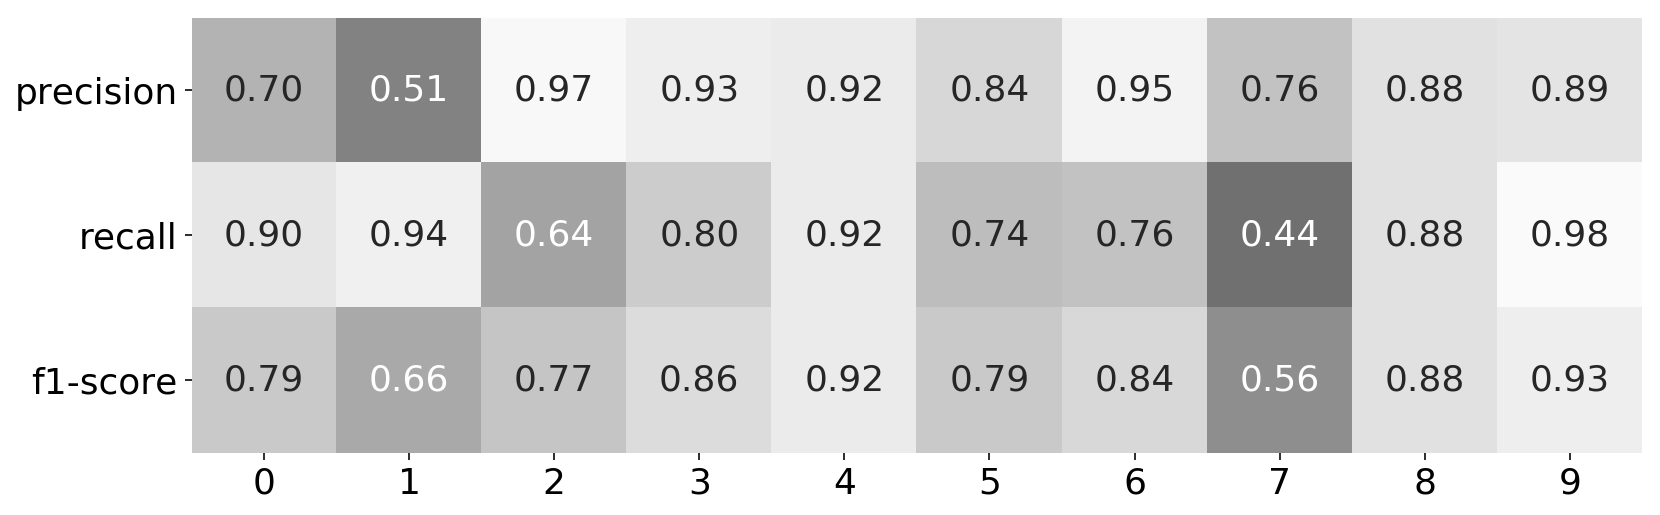

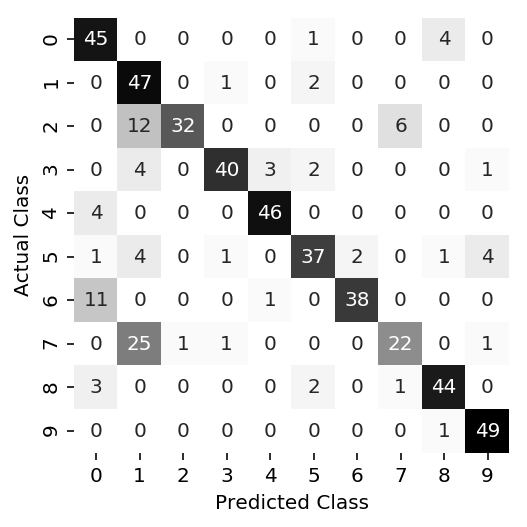

DecisionTreeClassifier


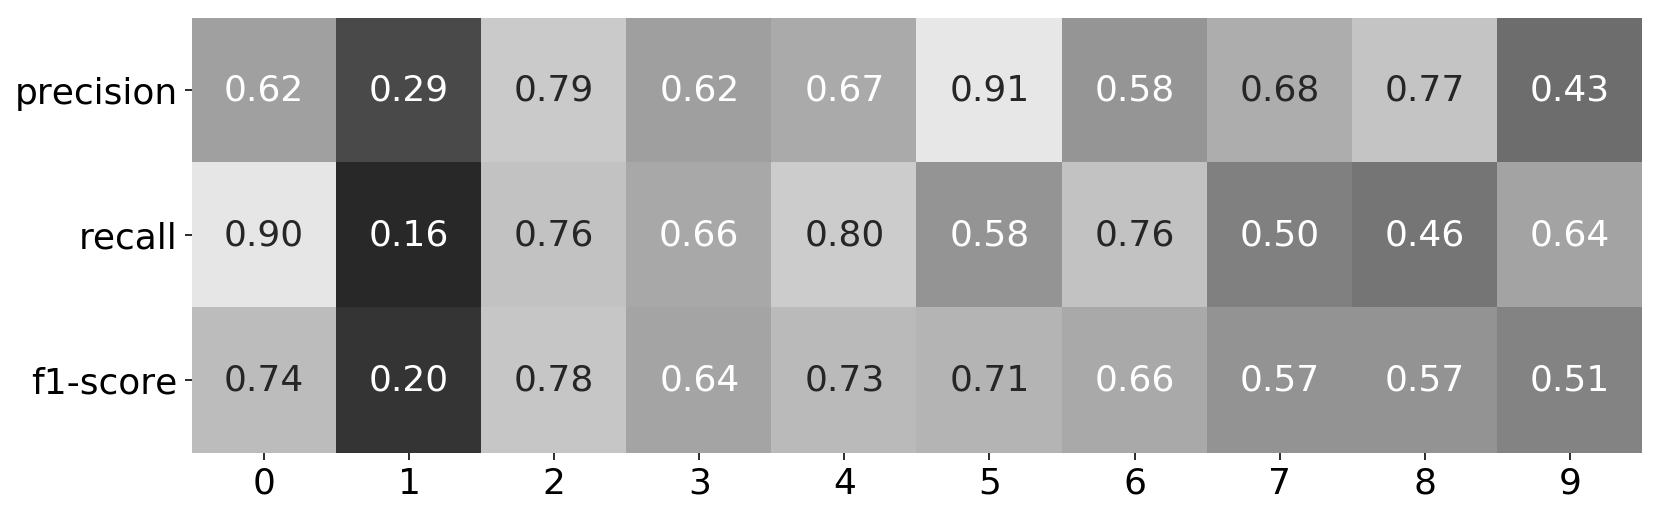

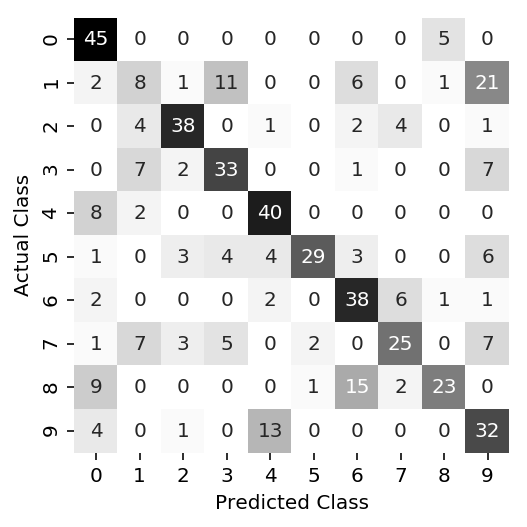

KNeighborsClassifier


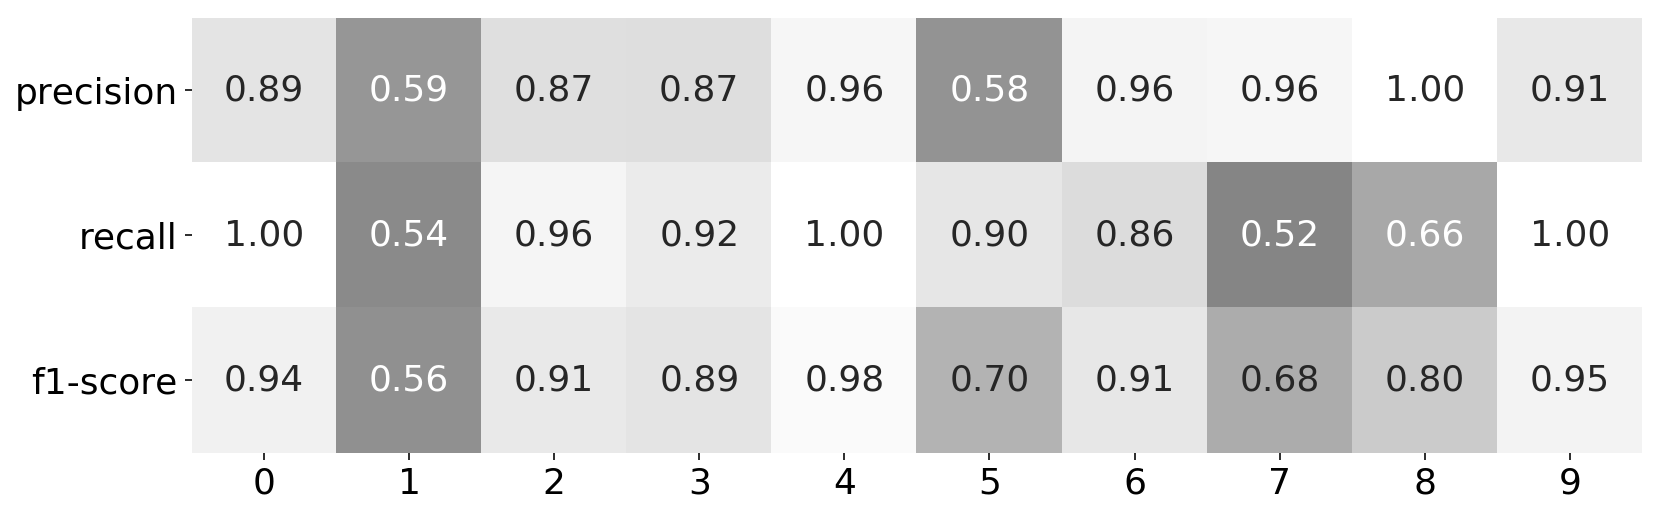

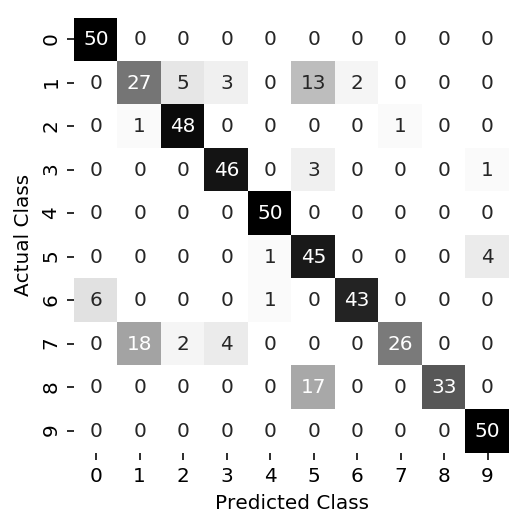

In [7]:
for model in [svm,tree,knn]:
    y_pred = model.predict(Xtest)
    print(model.__class__.__name__)
    prf=pd.DataFrame(classification_report(ytest, y_pred, output_dict=True)).round(3)
    prf = prf.drop('support', axis=0).drop(['micro avg','macro avg', 'weighted avg'], axis=1).iloc[[1,2,0]]
    plt.figure(figsize=(13,4))
    sns.heatmap(prf, annot=True, fmt='.2f', vmin=0, vmax=1,cbar=False, cmap='gray',annot_kws={"fontsize":18})
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18, rotation=0)
    plt.show()
    sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', square=True, cbar=False, xticklabels=model.classes_, yticklabels=model.classes_, cmap='binary')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

KNN


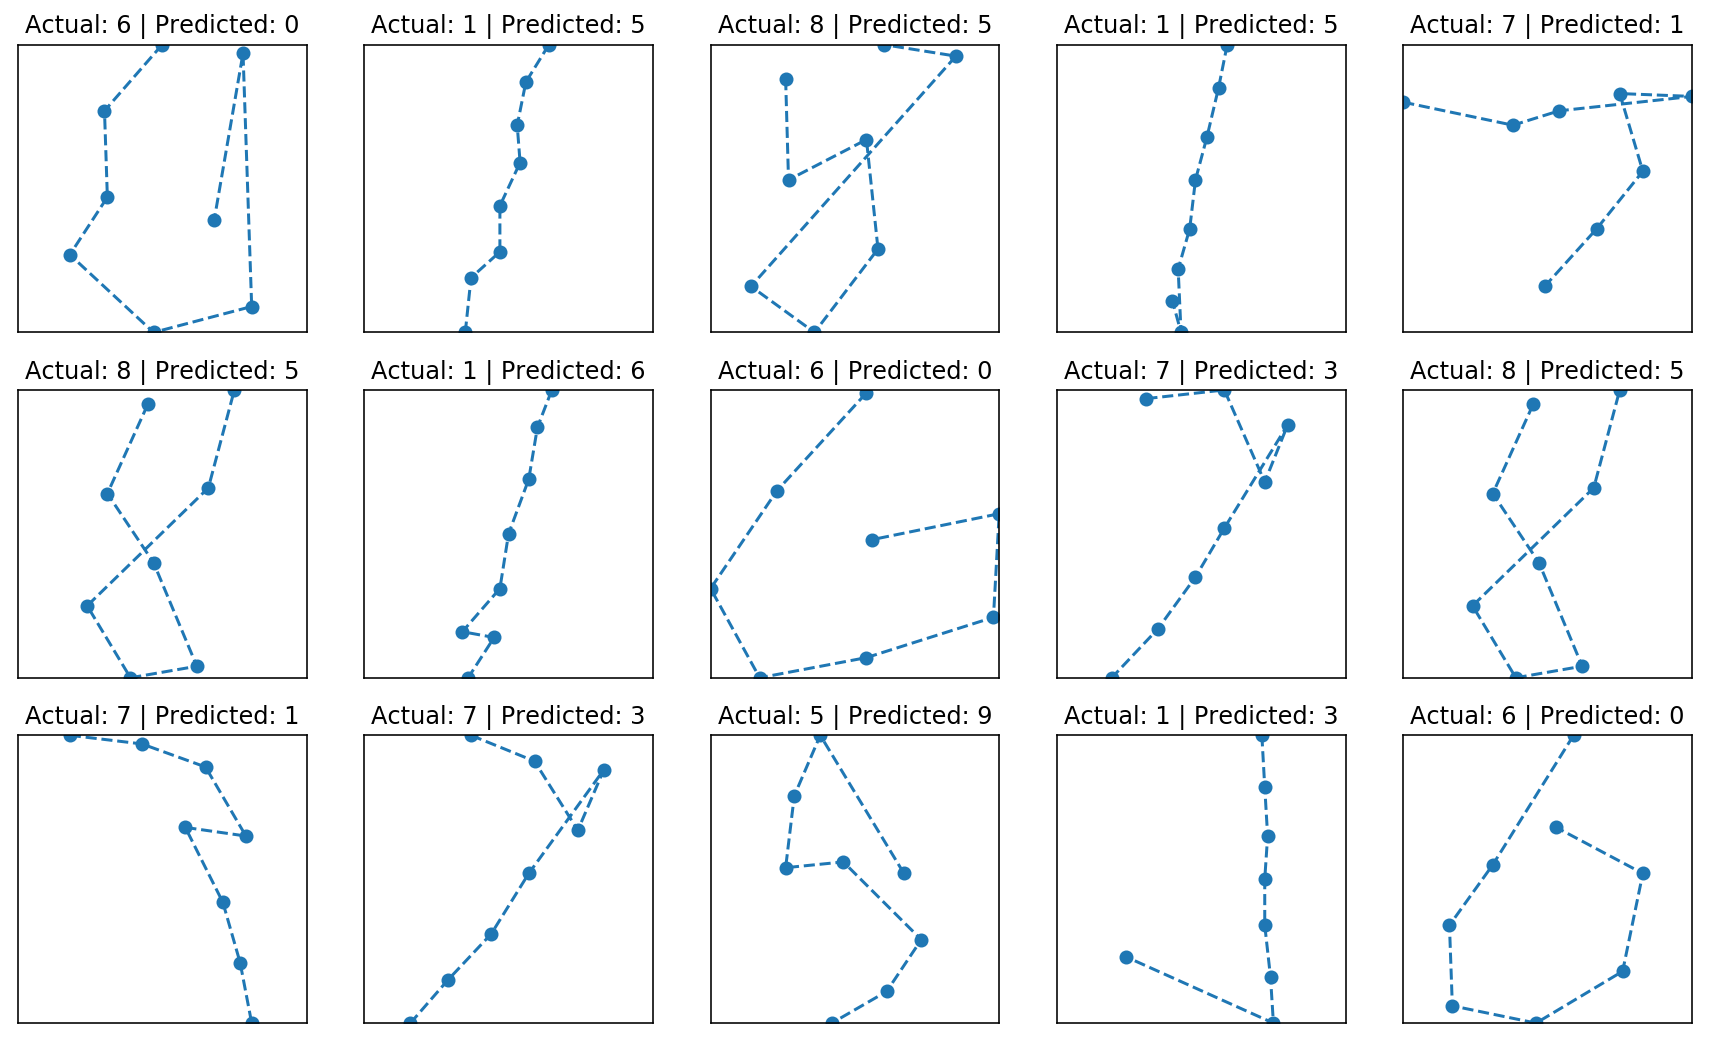

Decision Tree


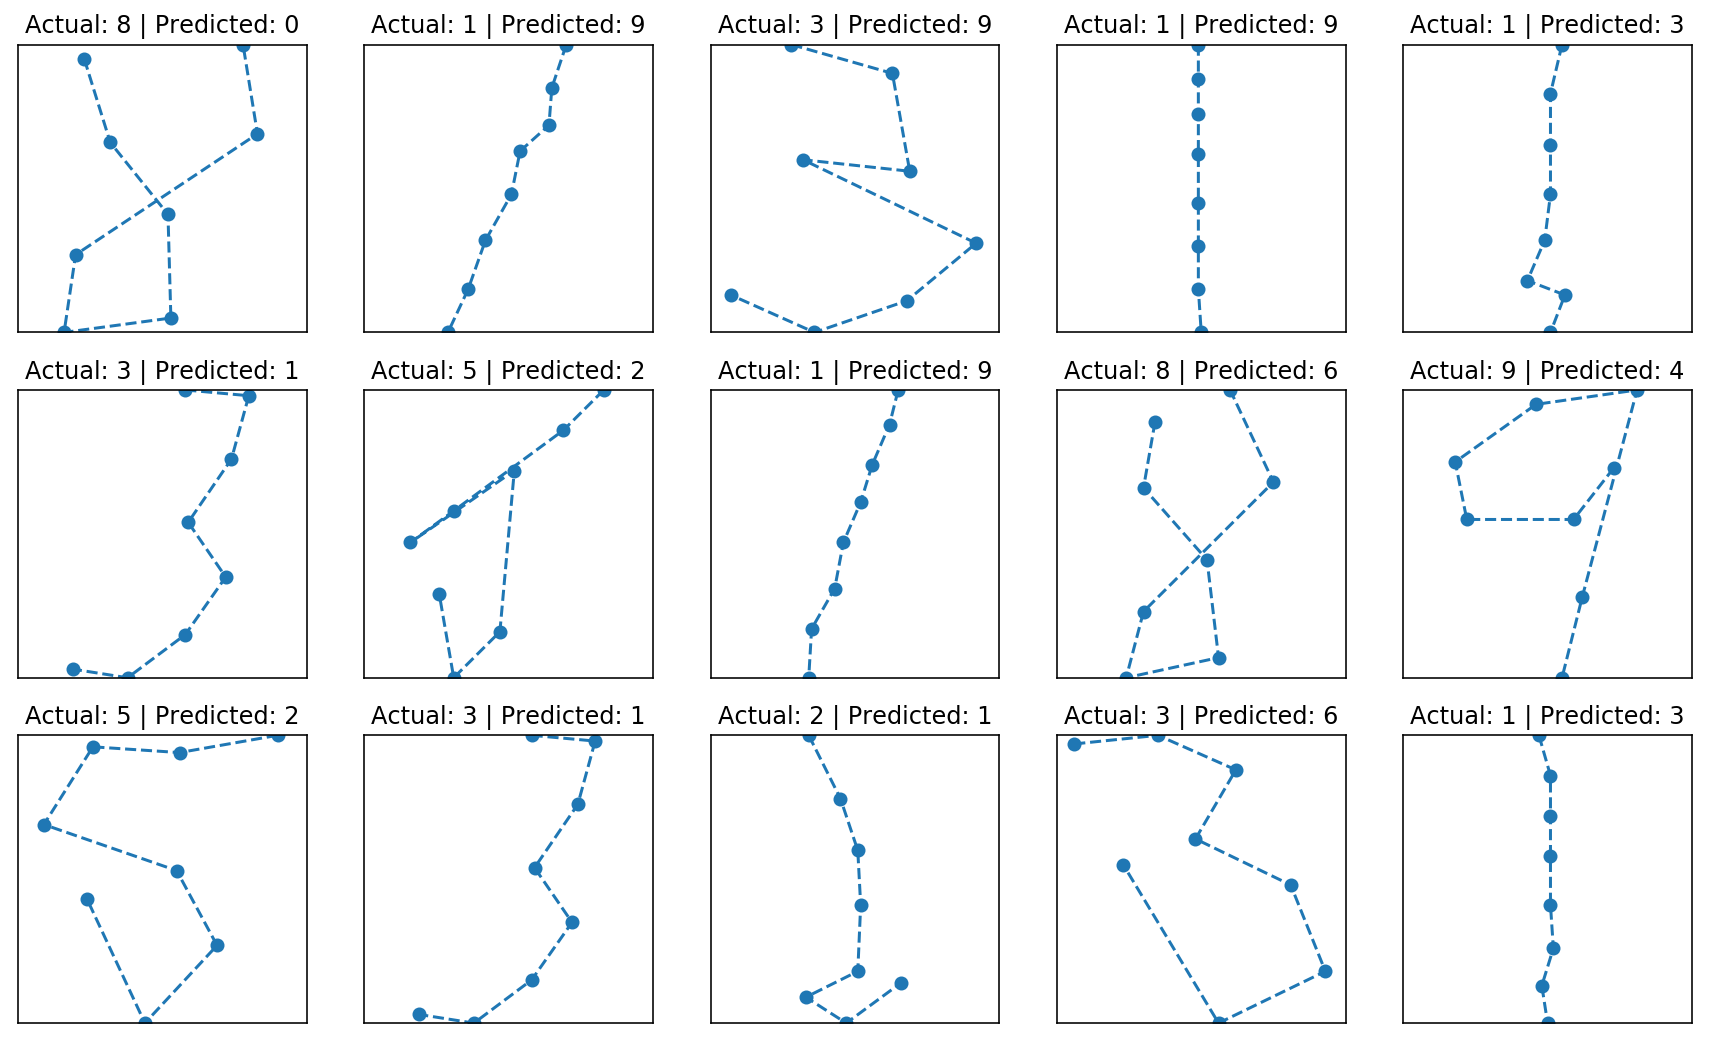

SVM


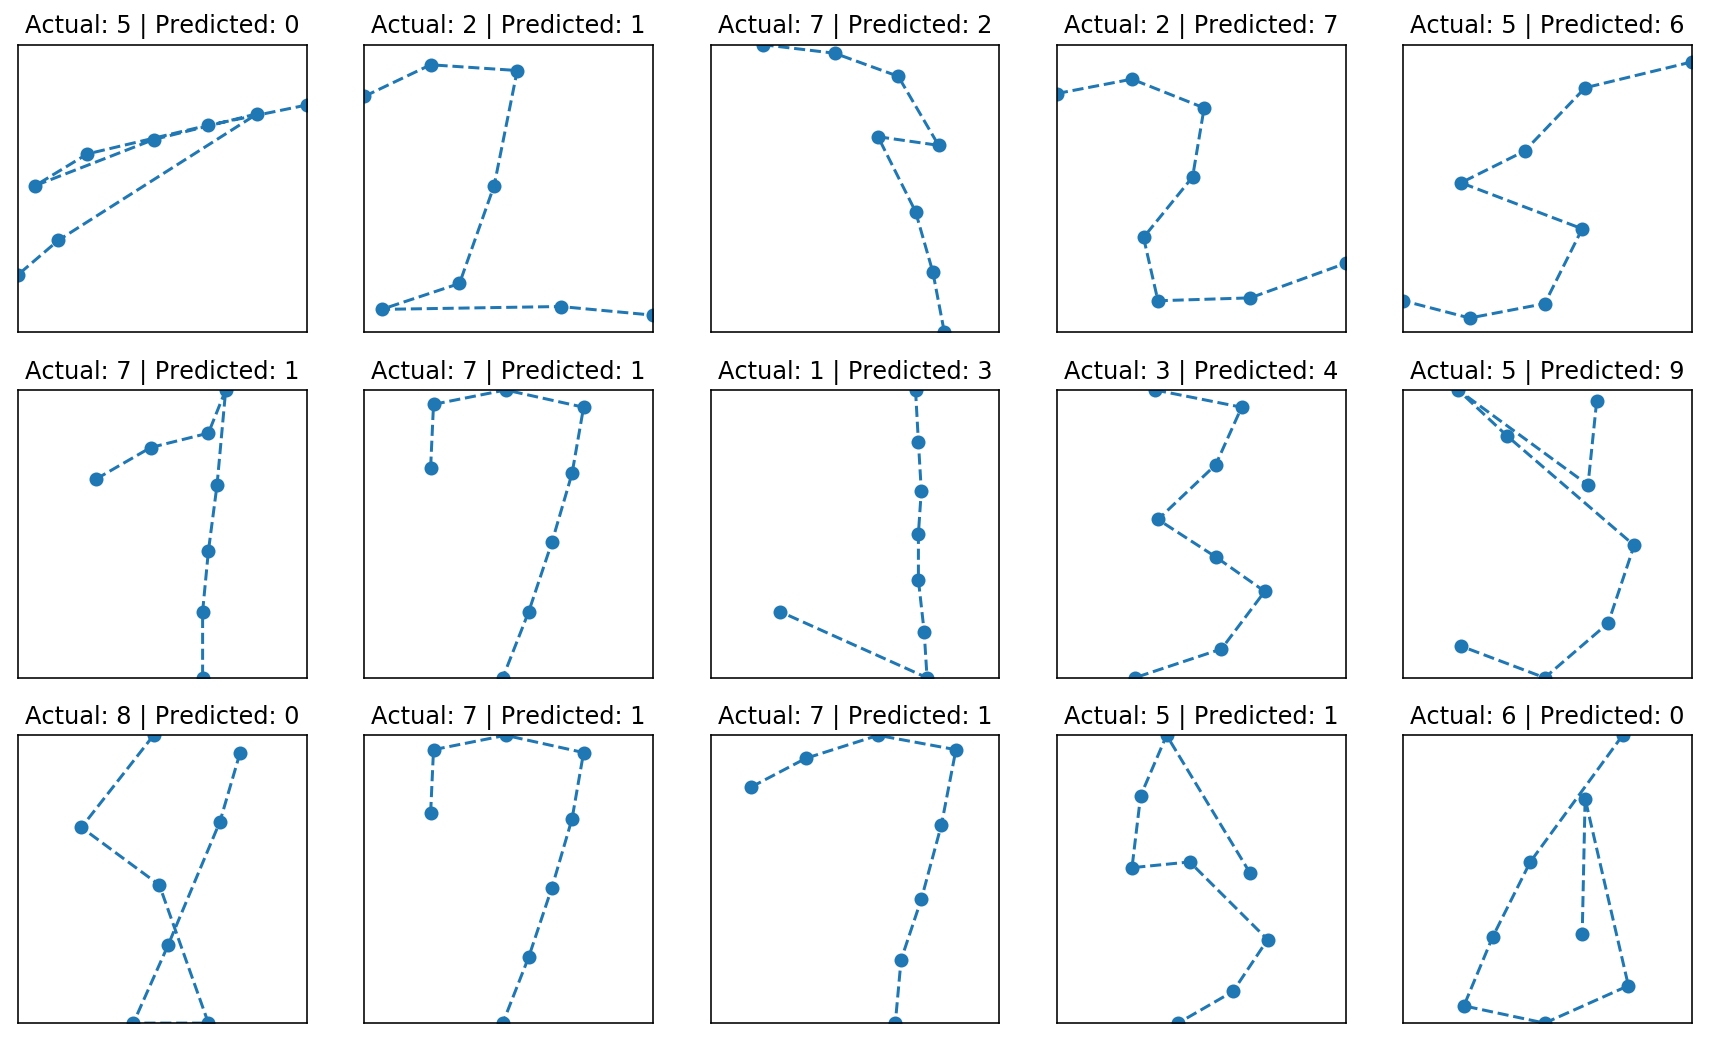

In [8]:
for model, name in [(knn, 'KNN'), (tree, 'Decision Tree'), (svm, 'SVM')]:
    np.random.seed(2)
    y_pred = model.predict(Xtest)
    misclassified = np.where(ytest!=y_pred)[0]
    r, c = 3,5
    samples = np.random.choice(misclassified, r*c)
    fig = plt.figure(figsize=(15,9))
    for i in range(r*c):
        plt.subplot(r,c,i+1)
        p = Xtest.iloc[samples[i]].values.reshape((8,2))
        plt.plot(p[:,0],p[:,1],'--o')
        plt.title('Actual: '+str(ytest[samples[i]])+' | Predicted: '+str(y_pred[samples[i]]))
        plt.xlim((0,100))
        plt.ylim((0,100))
        plt.xticks([])
        plt.yticks([])
#     fig.suptitle('Examples misclassified by '+ name)
    print(name)
    plt.show()